In [1]:
from cameo import models
import pandas as pd
import numpy as np

# All available models from http://bigg.ucsd.edu/models database

In [2]:
models.index_models_bigg()[:40]

,bigg_id,gene_count,reaction_count,organism,metabolite_count
0,e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72
1,iAB_RBC_283,346,469,Homo sapiens,342
2,iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668
3,iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668
4,iAF692,692,690,Methanosarcina barkeri str. Fusaro,628
5,iAF987,987,1285,Geobacter metallireducens GS-15,1109
6,iAM_Pb448,448,1067,Plasmodium berghei,903
7,iAM_Pc455,455,1074,Plasmodium cynomolgi strain B,907
8,iAM_Pf480,480,1083,Plasmodium falciparum 3D7,909
9,iAM_Pk459,459,1079,Plasmodium knowlesi strain H,909


## Division of organisms

In [2]:
cell_wall_type = {'gram_negative': ['Escherichia coli', 'Geobacter metallireducens', 'Acinetobacter baumannii', 'Helicobacter pylori',
                                   'Synechococcus elongatus', 'Pseudomonas putida', 'Synechocystis sp.', 'Thermotoga maritima',
                                   'Yersinia pestis', 'Shigella flexneri', 'Shigella boydii', 'Shigella dysenteriae', 'Shigella sonnei',
                                    'Klebsiella pneumoniae', 'Salmonella pan-reactome', 'Salmonella enterica'],
                  'gram_positive': ['Clostridioides difficile', 'Mycobacterium tuberculosis', 'Clostridium ljungdahlii', 'Lactococcus lactis',
                                   'Staphylococcus aureus', 'Bacillus subtilis'],
                  'gram_variable': ['Methanosarcina barkeri']}
cell_wall_type_map = {}
for k, v in cell_wall_type.items():
    for organism in v:
        cell_wall_type_map[organism] = k

kingdoms = {'animalia': ['Homo sapiens', 'Cricetulus griseus', 'Mus musculus'],
            'fungi': ['Saccharomyces cerevisiae'],
#             'plantae': [''],
            'chromista': ['Phaeodactylum tricornutum', 'Chlamydomonas reinhardtii'],
            'protozoa': ['Plasmodium berghei', 'Plasmodium cynomolgi', 'Plasmodium knowlesi', 'Plasmodium falciparum',
                         'Plasmodium vivax', 'Trypanosoma cruzi'],
            'bacteria': ['Escherichia coli', 'Methanosarcina barkeri', 'Geobacter metallireducens', 'Acinetobacter baumannii',
                        'Clostridioides difficile', 'Mycobacterium tuberculosis', 'Clostridium ljungdahlii', 'Helicobacter pylori',
                        'Synechococcus elongatus', 'Pseudomonas putida', 'Synechocystis sp.', 'Thermotoga maritima', 'Lactococcus lactis',
                        'Yersinia pestis', 'Shigella flexneri', 'Staphylococcus aureus', 'Shigella dysenteriae', 'Shigella boydii',
                        'Klebsiella pneumoniae', 'Bacillus subtilis', 'Salmonella pan-reactome', 'Salmonella enterica', 'Shigella sonnei']}
kingdoms_map = {}
for k, v in kingdoms.items():
    for organism in v:
        kingdoms_map[organism] = k

empires = {'prokaryota': ['bacteria'],
           'eukaryota': ['animalia', 'fungi', 'chromista', 'protozoa']}

empires_map = {}
for k, v in empires.items():
    for kingdom in v:
        for organism in kingdoms[kingdom]:
            empires_map[organism] = k

bigg_models = models.index_models_bigg().set_index('bigg_id')
bigg_models['organism_type'] = bigg_models['organism'].apply(lambda x: ' '.join(x.split(' ')[:2]))

bigg_models_bacteria = bigg_models[bigg_models['organism_type'].isin(kingdoms['bacteria'])]
bigg_models_bacteria['cell_wall_type'] = bigg_models_bacteria['organism_type'].apply(lambda x: cell_wall_type_map[x])

bigg_models['kingdom'] = bigg_models['organism_type'].apply(lambda x: kingdoms_map[x])

bigg_models['empire'] = bigg_models['organism_type'].apply(lambda x: empires_map[x])

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## All organisms classified by the kingdom which they belong to, from Cavalier-Smith six-kingdom model

![six_kingdoms](../img/six_kingdoms.png)

In [18]:
bigg_models[bigg_models['kingdom'] == 'animalia']

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire
bigg_id,,,,,,,
iAB_RBC_283,346,469,Homo sapiens,342,Homo sapiens,animalia,eukaryota
iAT_PLT_636,636,1008,Homo sapiens,738,Homo sapiens,animalia,eukaryota
iCHOv1,1766,6663,Cricetulus griseus,4456,Cricetulus griseus,animalia,eukaryota
iCHOv1_DG44,1184,3942,Cricetulus griseus,2751,Cricetulus griseus,animalia,eukaryota
iMM1415,1375,3726,Mus musculus,2775,Mus musculus,animalia,eukaryota
RECON1,1905,3741,Homo sapiens,2766,Homo sapiens,animalia,eukaryota
Recon3D,2248,10600,Homo sapiens,5835,Homo sapiens,animalia,eukaryota


In [10]:
bigg_models.groupby('kingdom').nunique()

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire
kingdom,,,,,,,
animalia,7,7,3,7,3,1,1
bacteria,77,70,73,64,23,1,1
chromista,2,2,2,2,2,1,1
fungi,2,2,1,2,1,1,1
protozoa,6,7,6,4,6,1,1


## Bacteria - classified by their cell wall type: gram_negative, gram_positive, gram_variable

![gram](../img/gram.jpg)

In [5]:
bigg_models_bacteria.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,gram_negative
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,gram_variable
iAF987,987,1285,Geobacter metallireducens GS-15,1109,Geobacter metallireducens,gram_negative


# Visualise example metabolic pathways as directed graphs

In [5]:
from cameo.network_analysis.networkx_based import model_to_network
import networkx as nx
import matplotlib.pyplot as plt

animal = models.bigg.iAT_PLT_636
bacteria = models.bigg.iCN718
protozoa = models.bigg.iAM_Pv461
chromista = models.bigg.iRC1080
fungi = models.bigg.iMM904
example_models = [animal, bacteria, protozoa, chromista, fungi]
names = ['animal', 'bacteria', 'protozoa', 'chromista', 'fungi']

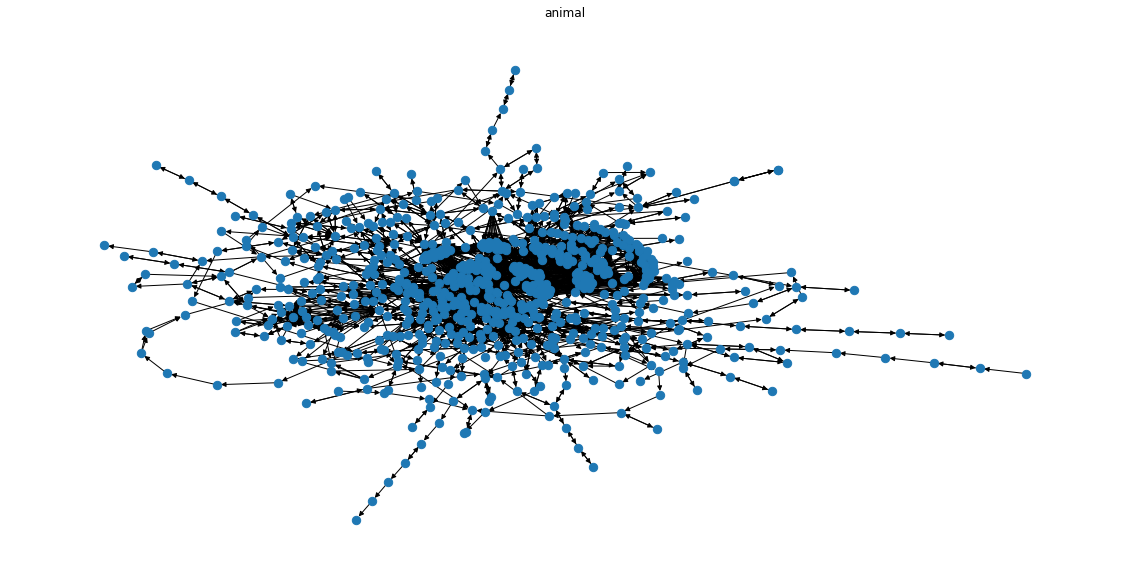

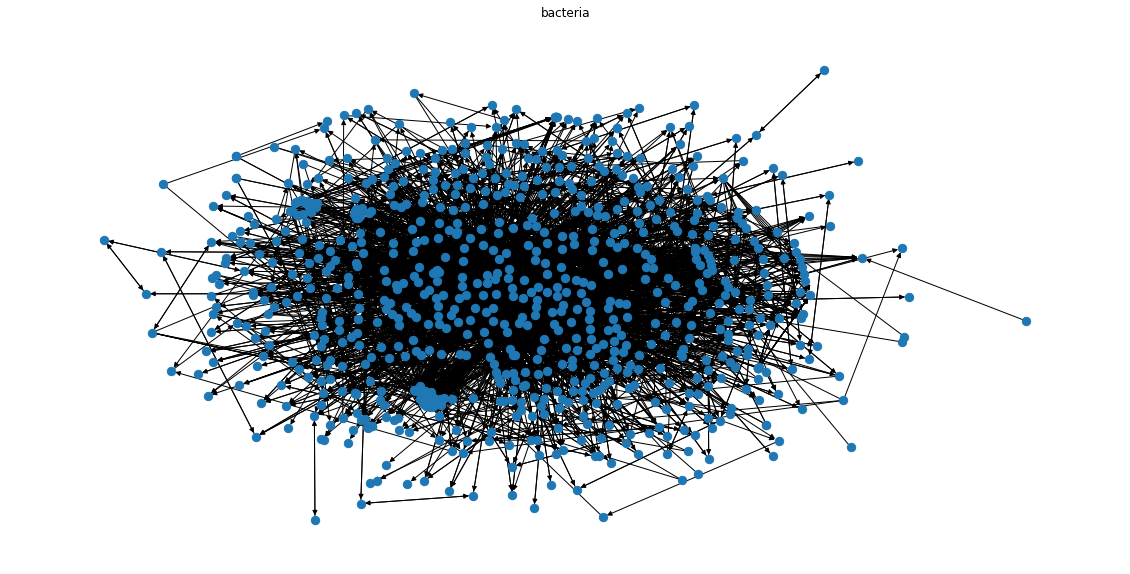

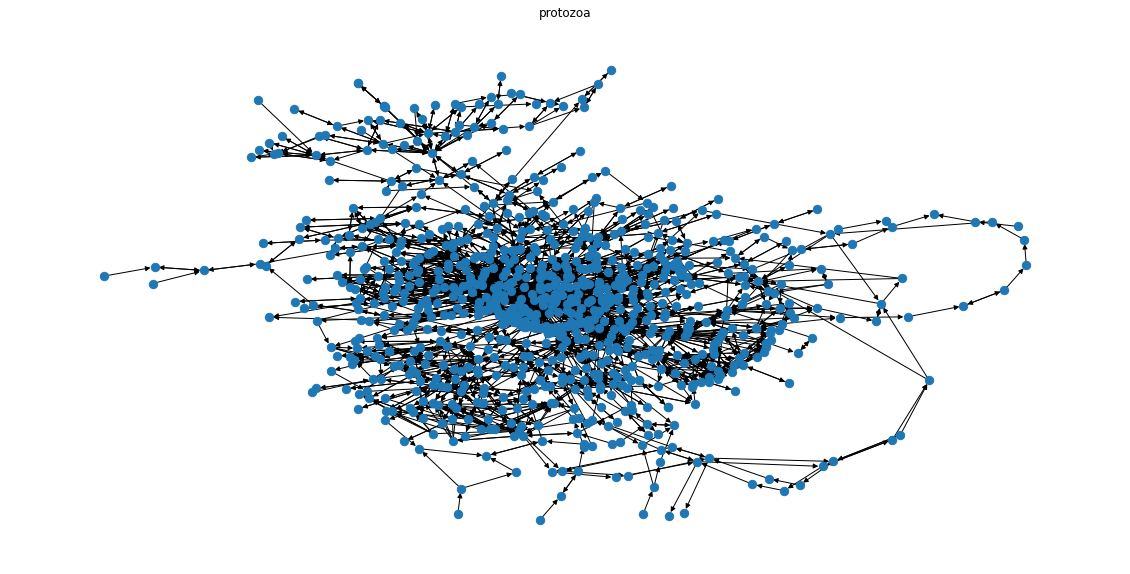

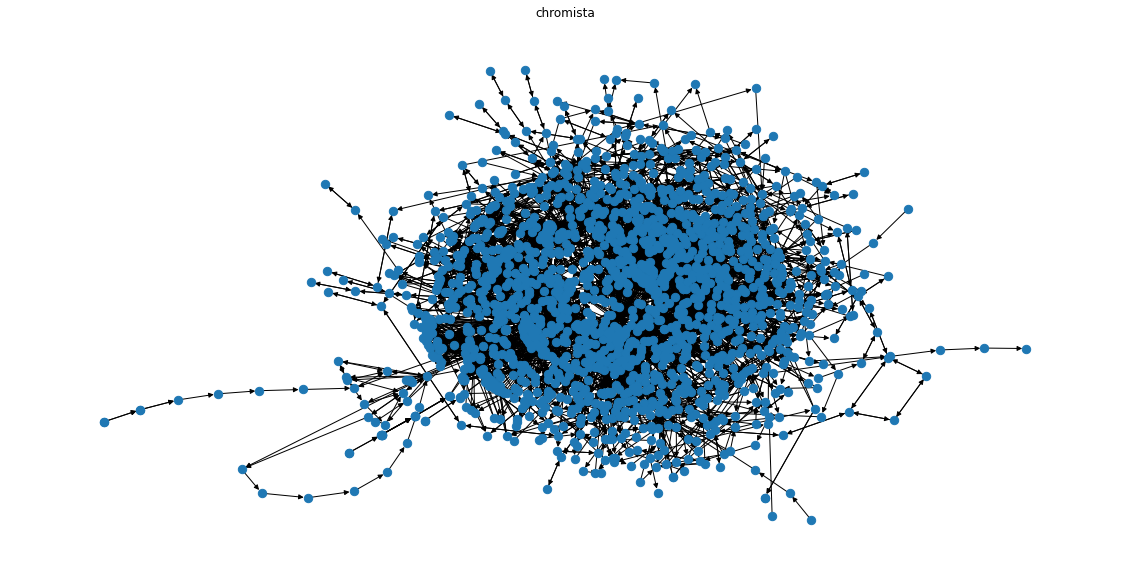

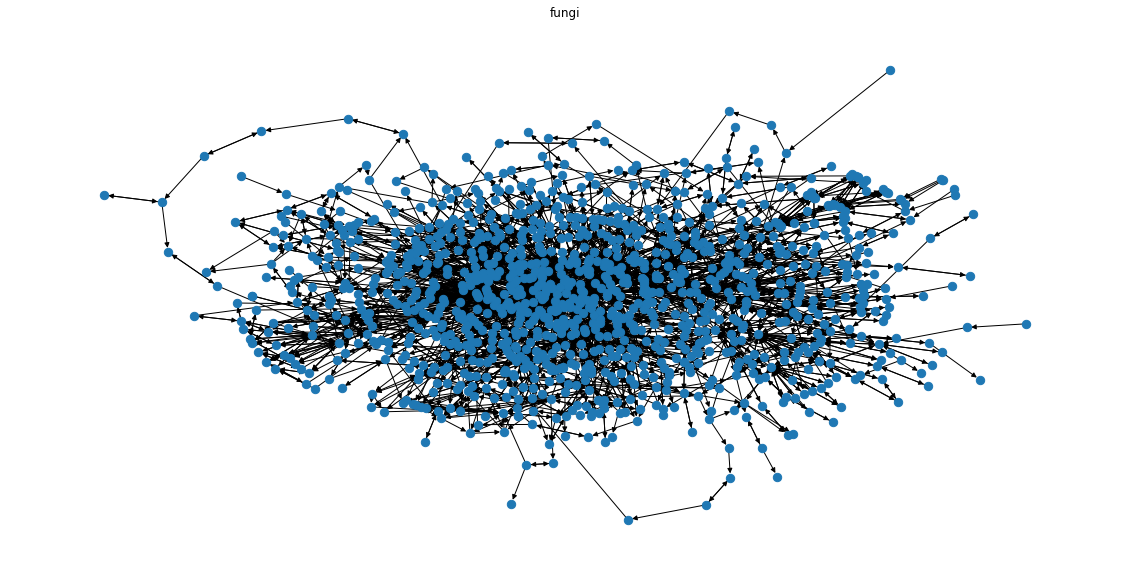

In [62]:
for model, name in zip(example_models, names):
    plt.figure(figsize=(20, 10))
    plt.title(name)
    G = model_to_network(model, max_distance=0.5)
    # Conversion from directed multi graph to directed graph
    G = nx.DiGraph(G)
    nx.draw_kamada_kawai(G, with_labels=False, node_size=70)
    plt.show()

# Extract metabolic pathways into graphs and then embed graphs into feature vector

In [3]:
from cameo.network_analysis.networkx_based import model_to_network
import networkx as nx

def model2graph(model):
    G = model_to_network(model, max_distance=1)
    # Conversion from directed multi graph to directed graph
    return nx.DiGraph(G)

In [4]:
import scipy.stats as stats

def embed_graph(G, model_name):
    graph_embedding = pd.DataFrame(data=[model_name], columns=['Model'])
    
    for value, feature in zip([G.in_degree(), G.out_degree(), nx.clustering(G)], ['vertex in degree', 'vertex out degree', 'clustering coefficient']):
        vector = np.asarray(list(dict(value).values()))
        graph_embedding['avg ' + feature] = vector.mean()
        graph_embedding['std ' + feature] = vector.std()
        graph_embedding['kurtosis ' + feature] = stats.kurtosis(vector)
        graph_embedding['skewness ' + feature] = stats.skew(vector)
    
    return graph_embedding.set_index('Model')

In [5]:
from tqdm import tqdm

features = pd.DataFrame()
for idx, model_id in enumerate(tqdm(models.index_models_bigg()['bigg_id'])):
    model = getattr(models.bigg, model_id)
    graph = model2graph(model)
    feature_vector = embed_graph(graph, model_name=model_id)
    features = pd.concat([features, feature_vector])
# features.to_csv('embedded_graphs.csv')

  4%|▎         | 4/108 [00:28<12:08,  7.00s/it]


KeyboardInterrupt: 

In [6]:
features = pd.read_csv('embedded_graphs.csv', index_col='Model')

## FEATURES:

In [8]:
features.head()

,avg vertex in degree,std vertex in degree,kurtosis vertex in degree,skewness vertex in degree,avg vertex out degree,std vertex out degree,kurtosis vertex out degree,skewness vertex out degree,avg clustering coefficient,std clustering coefficient,kurtosis clustering coefficient,skewness clustering coefficient
Model,,,,,,,,,,,,
e_coli_core,6.305556,5.264237,1.401481,1.266130,6.305556,7.469640,7.532070,2.532072,0.316940,0.277065,1.014157,1.212989
iAB_RBC_283,4.388889,8.003157,96.006484,9.214740,4.388889,9.727467,125.736759,10.299814,0.135271,0.153330,3.837053,1.609463
iAF1260,4.503597,15.069085,355.906657,17.749897,4.503597,20.824420,616.767008,22.475074,0.167974,0.161343,0.467154,0.800437
iAF1260b,4.513189,15.118689,354.246729,17.716446,4.513189,20.855686,616.598394,22.468878,0.168321,0.161488,0.451520,0.795348
iAF692,4.977707,11.656010,136.549762,10.848784,4.977707,16.220205,155.000438,11.435460,0.224562,0.196762,0.368874,0.749343


# Analysis - all organisms

### Scale features

In [9]:
# features_scaled = (features - features.mean()) / features.std()
features_scaled = (features - features.min(axis=0)) / (features.max(axis=0) - features.min(axis=0))

# Hierarchical clustering

### Draw dendogram in order to find number of clusters we are intrested in

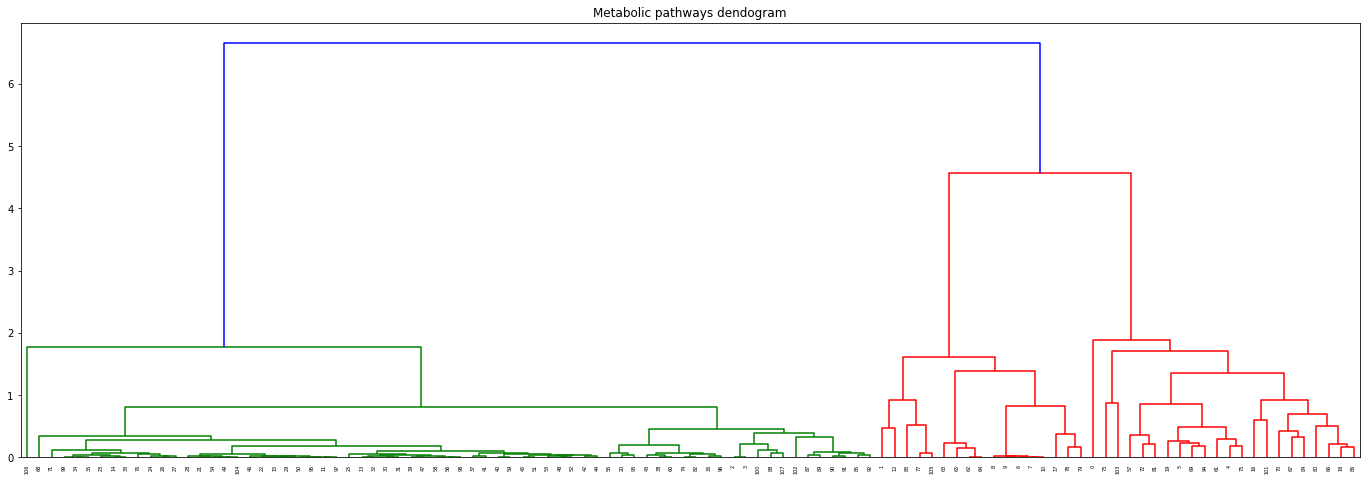

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.title("Metabolic pathways dendogram")
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

## Lets see how well clustering organisms into 2 groupd corresponds to 2 empires that all living organisms belong to

In [11]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
clusters = model.fit_predict(features_scaled)
bigg_models['cluster'] = clusters

In [12]:
bigg_models.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire,cluster
bigg_id,,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,bacteria,prokaryota,0
iAB_RBC_283,346,469,Homo sapiens,342,Homo sapiens,animalia,eukaryota,0
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,bacteria,prokaryota,0


In [13]:
pd.DataFrame(bigg_models.groupby(['empire', 'cluster']).agg({'kingdom': 'count'})).rename(columns={'kingdom': 'models_count'})

models_count
empire     cluster              
eukaryota  0                  19
           1                   1
prokaryota 0                  20
           1                  68

#### We can see that hierarchical clustering was able to group organisms into 2 empires based on their metabollic pathways really well.
- eukaryota: 19 out of all 20 eukaryota organisms where correctly put into cluster 1
- prokaryota: 68 out of all 88 prokaryota organisms where correctly put into cluster 0

# Lets visualise clusteres in the feature space reduced to 2 dimensions with tSNE

In [14]:
def plot_2d_scatter(X, y, simple=False):
    fig, plot = plt.subplots()
    fig.set_size_inches(15, 8)
    plt.prism()
    labels_map = {0: 'true eukaryota',
                  1: 'false prokaryota',
                  2: 'true prokaryota',
                  3: 'false eukaryota',}

    for i in range(max(y)+1):
        cluster = np.where(y == i)
        dim1 = X[cluster, 0]
        dim2 = X[cluster, 1]
        if simple:
            label = str(i)
        else:
            label = labels_map[i]
        plot.scatter(dim1, dim2, label=label)

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.title('Clusters resolved with hierarchical clustering in 2 dimensions')
    plt.show()

In [15]:
from sklearn.manifold import TSNE
bigg_models['labels'] = bigg_models['cluster']
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'eukaryota') & (bigg_models['cluster'] == 0)].index, 'labels'] = 0
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'eukaryota') & (bigg_models['cluster'] == 1)].index, 'labels'] = 1
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'prokaryota') & (bigg_models['cluster'] == 1)].index, 'labels'] = 2
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'prokaryota') & (bigg_models['cluster'] == 0)].index, 'labels'] = 3

tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_scaled)

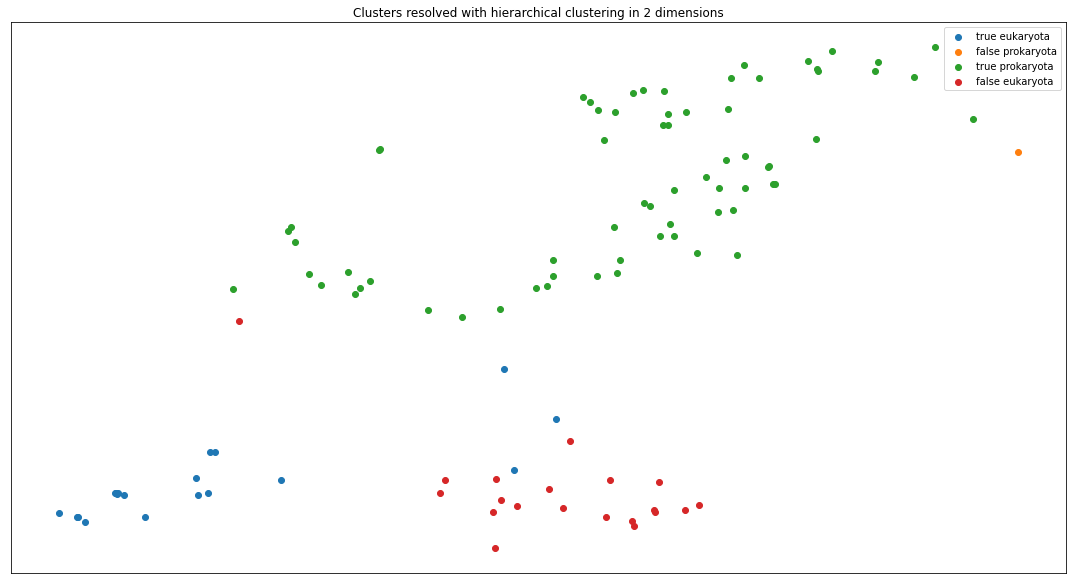

In [16]:
plot_2d_scatter(features_tsne, bigg_models['labels'])

## Lets see how well clustering organisms into 5 groups corresponds to 5 kingdoms that organisms from our data belong to

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=7, linkage='ward')
clusters = model.fit_predict(features_scaled)
bigg_models['cluster'] = clusters
bigg_models['true_cluster'] = pd.factorize(bigg_models['kingdom'], sort=True)[0]

In [18]:
bigg_models.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire,cluster,labels,true_cluster
bigg_id,,,,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,bacteria,prokaryota,3,3,1
iAB_RBC_283,346,469,Homo sapiens,342,Homo sapiens,animalia,eukaryota,6,0,0
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1,2,1
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1,2,1
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,bacteria,prokaryota,2,3,1


In [19]:
pd.DataFrame(bigg_models.groupby(['kingdom', 'cluster']).agg({'empire': 'count'})).rename(columns={'empire': 'models_count'})

models_count
kingdom   cluster              
animalia  0                   1
          2                   1
          4                   1
          6                   4
bacteria  1                  68
          2                  17
          3                   1
          5                   1
          6                   1
chromista 2                   1
          5                   1
fungi     0                   2
protozoa  0                   9

#### We can see that hierarchical clustering was able to group organisms into 5 kingdoms based on their metabollic pathways a bit worse than into empires but still pretty well.
- animalia: 4 out of all 7 animalia organisms where correctly put into cluster 6
- bacteria: 85 out of all 88 bacteria organisms where correctly put into cluster 1 or 2
- chromista: 1 out of all 2 chromista organisms where correctly put into cluster 5
- fungi: 2 out of all 2 fungi organisms where incorrectly put into cluster 0 and should be in cluster 3
- protozoa: 9 out of all 9 protozoa organisms where correctly put into cluster 0

# Lets visualise clusteres in the feature space reduced to 2 dimensions with tSNE

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_scaled)

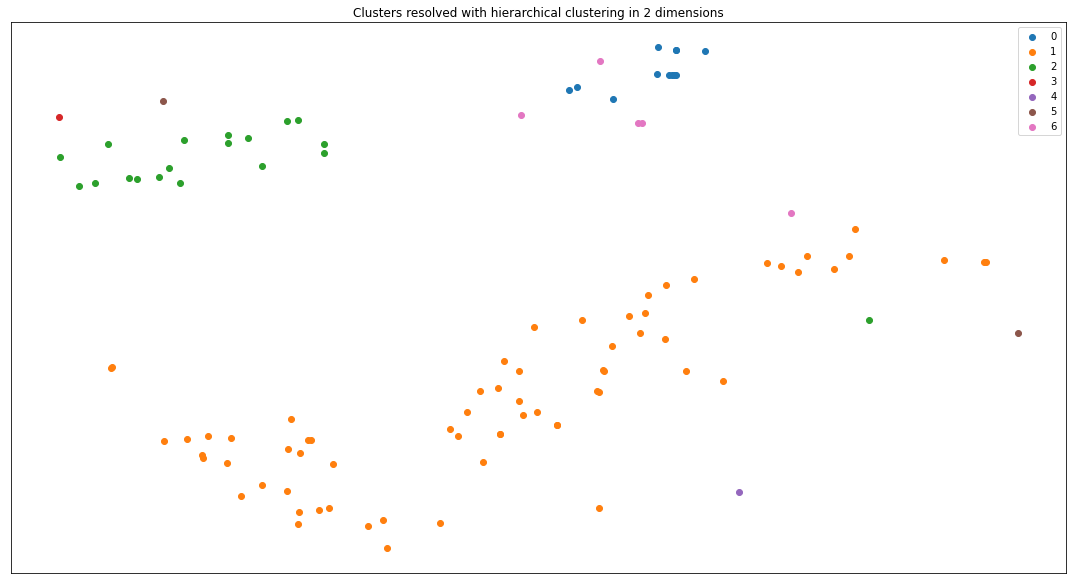

In [21]:
plot_2d_scatter(features_tsne, bigg_models['cluster'], simple=True)

## Lets see how well grouping bacteria into 3 clusters corresponds to 3 types of bacteria cell walls

In [22]:
features_scaled_bacteria = features_scaled.loc[bigg_models_bacteria.index]

### Draw dendogram in order to find number of clusters we are intrested in

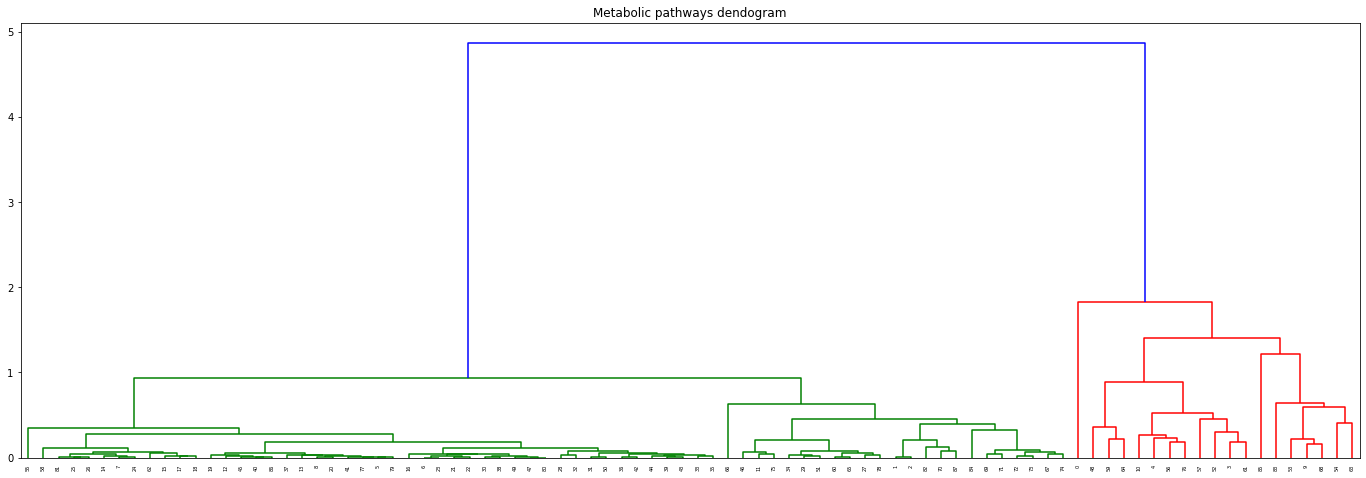

In [23]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.title("Metabolic pathways dendogram")
dend = shc.dendrogram(shc.linkage(features_scaled_bacteria, method='ward'))

In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(features_scaled_bacteria)
bigg_models_bacteria['cluster'] = clusters

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
bigg_models_bacteria.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type,cluster
bigg_id,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,gram_negative,2
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative,1
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative,1
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,gram_variable,0
iAF987,987,1285,Geobacter metallireducens GS-15,1109,Geobacter metallireducens,gram_negative,0


In [26]:
pd.DataFrame(bigg_models_bacteria.groupby(['cell_wall_type', 'cluster']).agg({'metabolite_count': 'count'})).rename(columns={'metabolite_count': 'models_count'})

models_count
cell_wall_type cluster              
gram_negative  0                   9
               1                  69
               2                   1
gram_positive  0                   8
gram_variable  0                   1

#### We can see that hierarchical clustering was able to group bacteria into 3 types based on their metabollic pathways very well.
- gram_negative: 69 out of all 79 gram_negative bacteria where correctly put into cluster 1
- gram_positive: 8 out of all 8 gram_positive bacteria where correctly put into cluster 0
- gram_variable: 1 out of all 1 gram_variable bacteria where incorrectly put into cluster 0 and should be put into cluster 2

# Lets visualise clusteres in the feature space reduced to 2 dimensions with tSNE

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_scaled_bacteria)

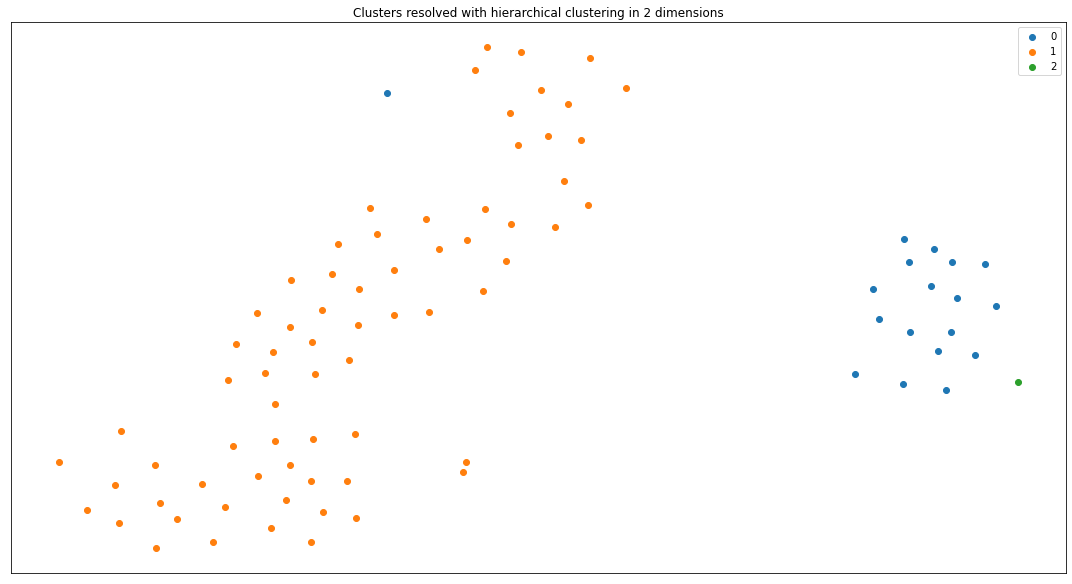

In [28]:
plot_2d_scatter(features_tsne, bigg_models_bacteria['cluster'], simple=True)

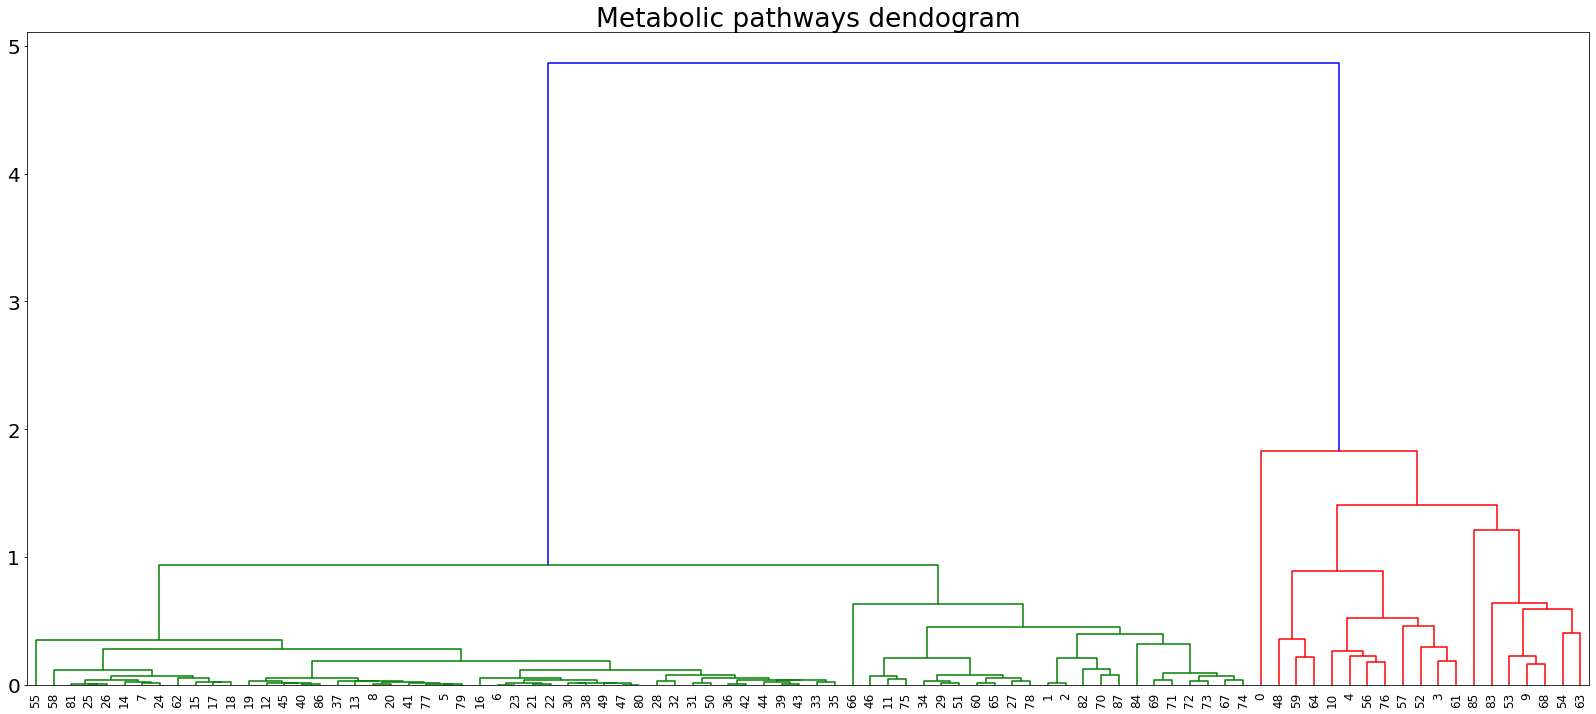

In [20]:
features_scaled_bacteria = features_scaled.loc[bigg_models_bacteria.index]
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# import matplotlib
# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)

fig = plt.figure(figsize=(28, 12))
ax = fig.add_subplot(1, 1, 1)
plt.title("Metabolic pathways dendogram")
dend = shc.dendrogram(shc.linkage(features_scaled_bacteria, method='ward'), ax=ax)
ax.tick_params(axis='x', which='major', labelsize=12)

In [42]:
left_green_idx = [55, 58, 81, 25, 26, 14, 7, 24, 62, 15, 17, 18, 19, 12, 45, 40, 86, 37, 13, 8, 20, 41, 77, 5, 79, 16, 6, 23, 21, 22, 30, 38, 49, 47, 80, 28, 32, 31, 50, 36, 42, 44, 39, 43, 33, 35]
right_green_idx = [66, 46, 11, 75, 34, 29, 51, 60, 65, 27, 78, 1, 2, 82, 70, 87, 84, 69, 71, 72, 73, 67, 74]
right_green_idx_0 = [46, 11, 75, 34, 29, 51, 60, 65, 27, 78]
right_green_idx_1 = [1, 2, 82, 70, 87, 84, 69, 71, 72, 73, 67, 74]
idx_0 = [84, 69, 71, 72, 73, 67, 74]
red_idx = [0, 48, 59, 64, 10, 4, 56, 76, 57, 52, 3, 61, 85, 83, 53, 9, 68, 54, 63]
idx_1 = [85, 83, 53, 9, 68, 54, 63]
idx_2 = [0, 48, 59, 64, 10, 4, 56, 76, 57, 52, 3, 61]


In [41]:
bigg_models_bacteria.iloc[idx_2]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,gram_negative
iEK1008,1008,1226,Mycobacterium tuberculosis H37Rv,998,Mycobacterium tuberculosis,gram_positive
iJR904,904,1075,Escherichia coli str. K-12 substr. MG1655,761,Escherichia coli,gram_negative
iNJ661,661,1025,Mycobacterium tuberculosis H37Rv,825,Mycobacterium tuberculosis,gram_positive
iCN900,900,1229,Clostridioides difficile 630,885,Clostridioides difficile,gram_positive
iAF987,987,1285,Geobacter metallireducens GS-15,1109,Geobacter metallireducens,gram_negative
iJN678,622,863,Synechocystis sp. PCC 6803,795,Synechocystis sp.,gram_negative
iSynCJ816,816,1044,Synechocystis sp. PCC 6803,928,Synechocystis sp.,gram_negative
iJN746,746,1054,Pseudomonas putida KT2440,907,Pseudomonas putida,gram_negative


In [39]:
bigg_models_bacteria.iloc[idx_1]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
iYS854,866,1455,Staphylococcus aureus subsp. aureus USA300_TCH...,1335,Staphylococcus aureus,gram_positive
iYO844,844,1250,Bacillus subtilis subsp. subtilis str. 168,990,Bacillus subtilis,gram_positive
iIT341,339,554,Helicobacter pylori 26695,485,Helicobacter pylori,gram_negative
iCN718,709,1015,Acinetobacter baumannii AYE,888,Acinetobacter baumannii,gram_negative
iSB619,619,743,Staphylococcus aureus subsp. aureus N315,655,Staphylococcus aureus,gram_positive
iJB785,785,849,Synechococcus elongatus PCC 7942,768,Synechococcus elongatus,gram_negative
iNF517,516,754,Lactococcus lactis subsp. cremoris MG1363,650,Lactococcus lactis,gram_positive


In [37]:
bigg_models_bacteria.iloc[red_idx]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,gram_negative
iEK1008,1008,1226,Mycobacterium tuberculosis H37Rv,998,Mycobacterium tuberculosis,gram_positive
iJR904,904,1075,Escherichia coli str. K-12 substr. MG1655,761,Escherichia coli,gram_negative
iNJ661,661,1025,Mycobacterium tuberculosis H37Rv,825,Mycobacterium tuberculosis,gram_positive
iCN900,900,1229,Clostridioides difficile 630,885,Clostridioides difficile,gram_positive
iAF987,987,1285,Geobacter metallireducens GS-15,1109,Geobacter metallireducens,gram_negative
iJN678,622,863,Synechocystis sp. PCC 6803,795,Synechocystis sp.,gram_negative
iSynCJ816,816,1044,Synechocystis sp. PCC 6803,928,Synechocystis sp.,gram_negative
iJN746,746,1054,Pseudomonas putida KT2440,907,Pseudomonas putida,gram_negative


## Genus shigella

In [33]:
bigg_models_bacteria.iloc[idx_0]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
iYS1720,1707,3357,Salmonella pan-reactome,2436,Salmonella pan-reactome,gram_negative
iSbBS512_1146,1147,2591,Shigella boydii CDC 3083-94,1910,Shigella boydii,gram_negative
iSDY_1059,1059,2539,Shigella dysenteriae Sd197,1888,Shigella dysenteriae,gram_negative
iSF_1195,1195,2630,Shigella flexneri 2a str. 301,1917,Shigella flexneri,gram_negative
iSFV_1184,1184,2621,Shigella flexneri 5 str. 8401,1917,Shigella flexneri,gram_negative
iS_1188,1188,2619,Shigella flexneri 2a str. 2457T,1914,Shigella flexneri,gram_negative
iSFxv_1172,1169,2638,Shigella flexneri 2002017,1918,Shigella flexneri,gram_negative


## Phyla Proteobacteria

In [34]:
bigg_models_bacteria.iloc[left_green_idx]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
iJN1463,1462,2927,Pseudomonas putida KT2440,2153,Pseudomonas putida,gram_negative
iJO1366,1367,2583,Escherichia coli str. K-12 substr. MG1655,1805,Escherichia coli,gram_negative
iY75_1357,1358,2759,Escherichia coli str. K-12 substr. W3110,1953,Escherichia coli,gram_negative
iEcDH1_1363,1363,2750,Escherichia coli DH1,1949,Escherichia coli,gram_negative
iECDH1ME8569_1439,1439,2755,Escherichia coli DH1,1950,Escherichia coli,gram_negative
iEC1349_Crooks,1349,2756,Escherichia coli ATCC 8739,1946,Escherichia coli,gram_negative
iBWG_1329,1329,2741,Escherichia coli BW2952,1949,Escherichia coli,gram_negative
iECDH10B_1368,1327,2742,Escherichia coli str. K-12 substr. DH10B,1947,Escherichia coli,gram_negative
iML1515,1516,2712,Escherichia coli str. K-12 substr. MG1655,1877,Escherichia coli,gram_negative


In [24]:
bigg_models_bacteria.iloc[right_green_idx]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
iPC815,815,1961,Yersinia pestis CO92,1552,Yersinia pestis,gram_negative
iECUMN_1333,1332,2740,Escherichia coli UMN026,1935,Escherichia coli,gram_negative
iE2348C_1286,1287,2703,Escherichia coli O127:H6 str. E2348/69,1919,Escherichia coli,gram_negative
iSSON_1240,1240,2693,Shigella sonnei Ss046,1936,Shigella sonnei,gram_negative
iECO103_1326,1327,2758,Escherichia coli O103:H2 str. 12009,1958,Escherichia coli,gram_negative
iECH74115_1262,1262,2694,Escherichia coli O157:H7 str. EC4115,1918,Escherichia coli,gram_negative
iG2583_1286,1283,2704,Escherichia coli O55:H7 str. CB9615,1919,Escherichia coli,gram_negative
iLF82_1304,1302,2726,Escherichia coli LF82,1938,Escherichia coli,gram_negative
iNRG857_1313,1311,2735,Escherichia coli O83:H1 str. NRG 857C,1943,Escherichia coli,gram_negative


In [43]:
bigg_models_bacteria.iloc[right_green_idx_0]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
iECUMN_1333,1332,2740,Escherichia coli UMN026,1935,Escherichia coli,gram_negative
iE2348C_1286,1287,2703,Escherichia coli O127:H6 str. E2348/69,1919,Escherichia coli,gram_negative
iSSON_1240,1240,2693,Shigella sonnei Ss046,1936,Shigella sonnei,gram_negative
iECO103_1326,1327,2758,Escherichia coli O103:H2 str. 12009,1958,Escherichia coli,gram_negative
iECH74115_1262,1262,2694,Escherichia coli O157:H7 str. EC4115,1918,Escherichia coli,gram_negative
iG2583_1286,1283,2704,Escherichia coli O55:H7 str. CB9615,1919,Escherichia coli,gram_negative
iLF82_1304,1302,2726,Escherichia coli LF82,1938,Escherichia coli,gram_negative
iNRG857_1313,1311,2735,Escherichia coli O83:H1 str. NRG 857C,1943,Escherichia coli,gram_negative
iEcE24377_1341,1341,2763,Escherichia coli O139:H28 str. E24377A,1972,Escherichia coli,gram_negative


In [29]:
bigg_models_bacteria.iloc[right_green_idx_1]

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative
iYL1228,1229,2262,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,1658,Klebsiella pneumoniae,gram_negative
iSBO_1134,1134,2591,Shigella boydii Sb227,1908,Shigella boydii,gram_negative
STM_v1_0,1271,2545,Salmonella enterica subsp. enterica serovar Ty...,1802,Salmonella enterica,gram_negative
iYS1720,1707,3357,Salmonella pan-reactome,2436,Salmonella pan-reactome,gram_negative
iSbBS512_1146,1147,2591,Shigella boydii CDC 3083-94,1910,Shigella boydii,gram_negative
iSDY_1059,1059,2539,Shigella dysenteriae Sd197,1888,Shigella dysenteriae,gram_negative
iSF_1195,1195,2630,Shigella flexneri 2a str. 301,1917,Shigella flexneri,gram_negative
